# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
常見的 optimizer 包含
- SGD
- RMSprop
- AdaGrad
- Adam

In [20]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [21]:
train, test = keras.datasets.cifar10.load_data()

In [22]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [23]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

MemoryError: 

## 選擇optimizer

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+ str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+ str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 0.1
EPOCHS = 200
BATCH_SIZE = 256
# MOMENTUM = 0.95

In [7]:
results = {}
for opt in ['SGD', 'RMSprop', 'AdaGrad', 'Adam']:
    keras.backend.clear_session() # 清除舊的Graph
    print('Expertiment with： ' + opt + ' Optimizer')
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics = ['accuracy'])
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = opt
    results[exp_name_tag] = {'train-loss':train_loss,
                             'valid_loss':valid_loss,
                             'train_acc':train_acc,
                             'valid_acc':valid_acc}

W0724 20:34:41.106978  6308 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0724 20:34:41.108467  6308 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0724 20:34:41.139714  6308 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 20:34:41.141699  6308 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use

Expertiment with： SGD Optimizer
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
__________________________________

W0724 20:34:41.375266  6308 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 130us/step - loss: 2.1095 - acc: 0.2307 - val_loss: 1.9776 - val_acc: 0.2925
Epoch 2/200
50000/50000 [==============================] - 4s 81us/step - loss: 1.9183 - acc: 0.3143 - val_loss: 1.8915 - val_acc: 0.3172
Epoch 3/200
50000/50000 [==============================] - 4s 79us/step - loss: 1.8381 - acc: 0.3485 - val_loss: 1.8493 - val_acc: 0.3304
Epoch 4/200
50000/50000 [==============================] - 4s 78us/step - loss: 1.7885 - acc: 0.3695 - val_loss: 1.8525 - val_acc: 0.3350
Epoch 5/200
50000/50000 [==============================] - 4s 77us/step - loss: 1.7470 - acc: 0.3836 - val_loss: 1.7147 - val_acc: 0.3924
Epoch 6/200
50000/50000 [==============================] - 4s 85us/step - loss: 1.7161 - acc: 0.3928 - val_loss: 1.8032 - val_acc: 0.3600
Epoch 7/200
50000/50000 [==============================] - 4s 87us/step - loss: 1.6819 - acc: 0.4063 - val_loss: 1.6783 -

50000/50000 [==============================] - 4s 80us/step - loss: 1.1212 - acc: 0.6063 - val_loss: 1.3454 - val_acc: 0.5273
Epoch 60/200
50000/50000 [==============================] - 4s 76us/step - loss: 1.1109 - acc: 0.6082 - val_loss: 1.6860 - val_acc: 0.4262
Epoch 61/200
50000/50000 [==============================] - 4s 85us/step - loss: 1.1134 - acc: 0.6089 - val_loss: 1.5001 - val_acc: 0.4802
Epoch 62/200
50000/50000 [==============================] - 4s 83us/step - loss: 1.1026 - acc: 0.6119 - val_loss: 1.4152 - val_acc: 0.5075
Epoch 63/200
50000/50000 [==============================] - 4s 80us/step - loss: 1.0970 - acc: 0.6140 - val_loss: 1.5933 - val_acc: 0.4503
Epoch 64/200
50000/50000 [==============================] - 4s 80us/step - loss: 1.0865 - acc: 0.6184 - val_loss: 1.4005 - val_acc: 0.5091
Epoch 65/200
50000/50000 [==============================] - 4s 85us/step - loss: 1.0769 - acc: 0.6205 - val_loss: 1.4915 - val_acc: 0.4897
Epoch 66/200
50000/50000 [==============

50000/50000 [==============================] - 4s 82us/step - loss: 0.7125 - acc: 0.7505 - val_loss: 1.5590 - val_acc: 0.5169
Epoch 118/200
50000/50000 [==============================] - 4s 86us/step - loss: 0.7133 - acc: 0.7476 - val_loss: 1.8961 - val_acc: 0.4628
Epoch 119/200
50000/50000 [==============================] - 4s 80us/step - loss: 0.7147 - acc: 0.7487 - val_loss: 1.7093 - val_acc: 0.5000
Epoch 120/200
50000/50000 [==============================] - 5s 91us/step - loss: 0.7030 - acc: 0.7562 - val_loss: 1.5823 - val_acc: 0.5155
Epoch 121/200
50000/50000 [==============================] - 5s 101us/step - loss: 0.6851 - acc: 0.7592 - val_loss: 2.3465 - val_acc: 0.4113
Epoch 122/200
50000/50000 [==============================] - 4s 85us/step - loss: 0.7069 - acc: 0.7546 - val_loss: 1.7257 - val_acc: 0.4933
Epoch 123/200
50000/50000 [==============================] - 4s 89us/step - loss: 0.6786 - acc: 0.7626 - val_loss: 1.7417 - val_acc: 0.4729
Epoch 124/200
50000/50000 [======

50000/50000 [==============================] - 5s 105us/step - loss: 0.4062 - acc: 0.8672 - val_loss: 3.0399 - val_acc: 0.4355
Epoch 176/200
50000/50000 [==============================] - 5s 99us/step - loss: 0.4671 - acc: 0.8503 - val_loss: 2.0092 - val_acc: 0.5016
Epoch 177/200
50000/50000 [==============================] - 6s 117us/step - loss: 0.3734 - acc: 0.8763 - val_loss: 2.2029 - val_acc: 0.4873
Epoch 178/200
50000/50000 [==============================] - 6s 111us/step - loss: 0.3228 - acc: 0.8923 - val_loss: 1.9390 - val_acc: 0.5370
Epoch 179/200
50000/50000 [==============================] - 5s 105us/step - loss: 0.3558 - acc: 0.8823 - val_loss: 2.1241 - val_acc: 0.5045
Epoch 180/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.3595 - acc: 0.8816 - val_loss: 2.4139 - val_acc: 0.4719
Epoch 181/200
50000/50000 [==============================] - 5s 107us/step - loss: 0.3497 - acc: 0.8866 - val_loss: 2.0564 - val_acc: 0.5123
Epoch 182/200
50000/50000 [=

50000/50000 [==============================] - 5s 109us/step - loss: 1.1817 - acc: 0.5775 - val_loss: 1.7059 - val_acc: 0.4479
Epoch 25/200
50000/50000 [==============================] - 6s 110us/step - loss: 1.1627 - acc: 0.5859 - val_loss: 1.4927 - val_acc: 0.4921
Epoch 26/200
50000/50000 [==============================] - 6s 111us/step - loss: 1.1397 - acc: 0.5932 - val_loss: 1.5036 - val_acc: 0.4935
Epoch 27/200
50000/50000 [==============================] - 6s 112us/step - loss: 1.1221 - acc: 0.5983 - val_loss: 1.5125 - val_acc: 0.4838
Epoch 28/200
50000/50000 [==============================] - 6s 111us/step - loss: 1.0983 - acc: 0.6067 - val_loss: 1.5460 - val_acc: 0.4934
Epoch 29/200
50000/50000 [==============================] - 6s 114us/step - loss: 1.0809 - acc: 0.6160 - val_loss: 1.5848 - val_acc: 0.4777
Epoch 30/200
50000/50000 [==============================] - 6s 129us/step - loss: 1.0688 - acc: 0.6157 - val_loss: 1.6139 - val_acc: 0.4770
Epoch 31/200
50000/50000 [=======

Epoch 83/200
50000/50000 [==============================] - 5s 100us/step - loss: 0.5050 - acc: 0.8187 - val_loss: 2.6469 - val_acc: 0.4861
Epoch 84/200
50000/50000 [==============================] - 5s 98us/step - loss: 0.4953 - acc: 0.8206 - val_loss: 2.6499 - val_acc: 0.4694
Epoch 85/200
50000/50000 [==============================] - 6s 113us/step - loss: 0.4971 - acc: 0.8198 - val_loss: 2.7377 - val_acc: 0.4856
Epoch 86/200
50000/50000 [==============================] - 5s 108us/step - loss: 0.4870 - acc: 0.8255 - val_loss: 2.8509 - val_acc: 0.4632
Epoch 87/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.4843 - acc: 0.8259 - val_loss: 2.7236 - val_acc: 0.4666
Epoch 88/200
50000/50000 [==============================] - 5s 94us/step - loss: 0.4808 - acc: 0.8280 - val_loss: 2.6386 - val_acc: 0.4867
Epoch 89/200
50000/50000 [==============================] - 5s 97us/step - loss: 0.4792 - acc: 0.8280 - val_loss: 2.8158 - val_acc: 0.4849
Epoch 90/200
50000/5000

50000/50000 [==============================] - 5s 93us/step - loss: 0.3160 - acc: 0.8899 - val_loss: 3.5932 - val_acc: 0.4736
Epoch 142/200
50000/50000 [==============================] - 5s 93us/step - loss: 0.3162 - acc: 0.8921 - val_loss: 3.8236 - val_acc: 0.4753
Epoch 143/200
50000/50000 [==============================] - 5s 91us/step - loss: 0.3159 - acc: 0.8902 - val_loss: 3.6250 - val_acc: 0.4869
Epoch 144/200
50000/50000 [==============================] - 5s 94us/step - loss: 0.3061 - acc: 0.8940 - val_loss: 3.7646 - val_acc: 0.4771
Epoch 145/200
50000/50000 [==============================] - 5s 91us/step - loss: 0.3077 - acc: 0.8926 - val_loss: 3.7597 - val_acc: 0.4792
Epoch 146/200
50000/50000 [==============================] - 5s 92us/step - loss: 0.3022 - acc: 0.8949 - val_loss: 3.8389 - val_acc: 0.4740
Epoch 147/200
50000/50000 [==============================] - 5s 92us/step - loss: 0.2966 - acc: 0.8961 - val_loss: 3.8338 - val_acc: 0.4774
Epoch 148/200
50000/50000 [=======

50000/50000 [==============================] - 5s 96us/step - loss: 0.2384 - acc: 0.9210 - val_loss: 4.4234 - val_acc: 0.4646
Epoch 200/200
50000/50000 [==============================] - 5s 101us/step - loss: 0.2297 - acc: 0.9229 - val_loss: 4.3268 - val_acc: 0.4734
Expertiment with： AdaGrad Optimizer
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 6

50000/50000 [==============================] - 5s 99us/step - loss: 1.1133 - acc: 0.6066 - val_loss: 1.3925 - val_acc: 0.5242
Epoch 50/200
50000/50000 [==============================] - 5s 94us/step - loss: 1.1060 - acc: 0.6097 - val_loss: 1.4280 - val_acc: 0.5106
Epoch 51/200
50000/50000 [==============================] - 5s 102us/step - loss: 1.0961 - acc: 0.6126 - val_loss: 1.3945 - val_acc: 0.5164
Epoch 52/200
50000/50000 [==============================] - 5s 100us/step - loss: 1.0935 - acc: 0.6147 - val_loss: 1.4574 - val_acc: 0.5027
Epoch 53/200
50000/50000 [==============================] - 5s 98us/step - loss: 1.0827 - acc: 0.6187 - val_loss: 1.3795 - val_acc: 0.5249
Epoch 54/200
50000/50000 [==============================] - 5s 96us/step - loss: 1.0764 - acc: 0.6209 - val_loss: 1.3871 - val_acc: 0.5223
Epoch 55/200
50000/50000 [==============================] - 5s 101us/step - loss: 1.0698 - acc: 0.6249 - val_loss: 1.4099 - val_acc: 0.5167
Epoch 56/200
50000/50000 [===========

Epoch 108/200
50000/50000 [==============================] - 5s 108us/step - loss: 0.7880 - acc: 0.7284 - val_loss: 1.5394 - val_acc: 0.5303
Epoch 109/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.7794 - acc: 0.7321 - val_loss: 1.5945 - val_acc: 0.5180
Epoch 110/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.7769 - acc: 0.7340 - val_loss: 1.5484 - val_acc: 0.5271
Epoch 111/200
50000/50000 [==============================] - 6s 110us/step - loss: 0.7728 - acc: 0.7351 - val_loss: 1.6139 - val_acc: 0.5171
Epoch 112/200
50000/50000 [==============================] - 5s 108us/step - loss: 0.7688 - acc: 0.7349 - val_loss: 1.5647 - val_acc: 0.5236
Epoch 113/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.7657 - acc: 0.7359 - val_loss: 1.5762 - val_acc: 0.5235
Epoch 114/200
50000/50000 [==============================] - 5s 109us/step - loss: 0.7613 - acc: 0.7377 - val_loss: 1.6042 - val_acc: 0.5113
Epoch 115/200

50000/50000 [==============================] - 5s 109us/step - loss: 0.5825 - acc: 0.8051 - val_loss: 1.8928 - val_acc: 0.5078
Epoch 167/200
50000/50000 [==============================] - 5s 106us/step - loss: 0.5804 - acc: 0.8059 - val_loss: 1.9458 - val_acc: 0.4990
Epoch 168/200
50000/50000 [==============================] - 6s 113us/step - loss: 0.5768 - acc: 0.8075 - val_loss: 1.8396 - val_acc: 0.5186
Epoch 169/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.5740 - acc: 0.8091 - val_loss: 1.8630 - val_acc: 0.5124
Epoch 170/200
50000/50000 [==============================] - 6s 110us/step - loss: 0.5715 - acc: 0.8100 - val_loss: 1.8570 - val_acc: 0.5221
Epoch 171/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.5653 - acc: 0.8118 - val_loss: 1.9678 - val_acc: 0.4983
Epoch 172/200
50000/50000 [==============================] - 6s 124us/step - loss: 0.5652 - acc: 0.8122 - val_loss: 1.9396 - val_acc: 0.5076
Epoch 173/200
50000/50000 [

Epoch 16/200
50000/50000 [==============================] - 6s 121us/step - loss: 1.2239 - acc: 0.5628 - val_loss: 1.4140 - val_acc: 0.5024
Epoch 17/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.2013 - acc: 0.5701 - val_loss: 1.4097 - val_acc: 0.5089
Epoch 18/200
50000/50000 [==============================] - 6s 127us/step - loss: 1.1866 - acc: 0.5765 - val_loss: 1.4161 - val_acc: 0.5054
Epoch 19/200
50000/50000 [==============================] - 6s 120us/step - loss: 1.1590 - acc: 0.5850 - val_loss: 1.3849 - val_acc: 0.5093
Epoch 20/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.1367 - acc: 0.5951 - val_loss: 1.4142 - val_acc: 0.5094
Epoch 21/200
50000/50000 [==============================] - 6s 124us/step - loss: 1.1244 - acc: 0.5994 - val_loss: 1.3726 - val_acc: 0.5262
Epoch 22/200
50000/50000 [==============================] - 6s 115us/step - loss: 1.1055 - acc: 0.6050 - val_loss: 1.3712 - val_acc: 0.5234
Epoch 23/200
50000/5

50000/50000 [==============================] - 5s 107us/step - loss: 0.4136 - acc: 0.8503 - val_loss: 2.4250 - val_acc: 0.5038
Epoch 75/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.4112 - acc: 0.8507 - val_loss: 2.4566 - val_acc: 0.5072
Epoch 76/200
50000/50000 [==============================] - 5s 100us/step - loss: 0.4110 - acc: 0.8507 - val_loss: 2.5357 - val_acc: 0.5060
Epoch 77/200
50000/50000 [==============================] - 5s 105us/step - loss: 0.4212 - acc: 0.8469 - val_loss: 2.4695 - val_acc: 0.5027
Epoch 78/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.4151 - acc: 0.8502 - val_loss: 2.5497 - val_acc: 0.5034
Epoch 79/200
50000/50000 [==============================] - 5s 101us/step - loss: 0.3794 - acc: 0.8634 - val_loss: 2.5575 - val_acc: 0.5074
Epoch 80/200
50000/50000 [==============================] - 5s 100us/step - loss: 0.3730 - acc: 0.8668 - val_loss: 2.5461 - val_acc: 0.5062
Epoch 81/200
50000/50000 [=======

50000/50000 [==============================] - 5s 107us/step - loss: 0.2213 - acc: 0.9212 - val_loss: 3.6067 - val_acc: 0.4988
Epoch 133/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.2281 - acc: 0.9181 - val_loss: 3.5427 - val_acc: 0.4995
Epoch 134/200
50000/50000 [==============================] - 5s 101us/step - loss: 0.2290 - acc: 0.9197 - val_loss: 3.6160 - val_acc: 0.5019
Epoch 135/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.2124 - acc: 0.9248 - val_loss: 3.5797 - val_acc: 0.4947
Epoch 136/200
50000/50000 [==============================] - 5s 101us/step - loss: 0.2688 - acc: 0.9051 - val_loss: 3.6701 - val_acc: 0.4897
Epoch 137/200
50000/50000 [==============================] - 6s 110us/step - loss: 0.2351 - acc: 0.9164 - val_loss: 3.5684 - val_acc: 0.4957
Epoch 138/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.2069 - acc: 0.9263 - val_loss: 3.5617 - val_acc: 0.5022
Epoch 139/200
50000/50000 [

Epoch 190/200
50000/50000 [==============================] - 5s 101us/step - loss: 0.1736 - acc: 0.9396 - val_loss: 4.1220 - val_acc: 0.4892
Epoch 191/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.1460 - acc: 0.9488 - val_loss: 4.1207 - val_acc: 0.4983
Epoch 192/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.1442 - acc: 0.9493 - val_loss: 4.2043 - val_acc: 0.4973
Epoch 193/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.1202 - acc: 0.9577 - val_loss: 4.3861 - val_acc: 0.4953
Epoch 194/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.2384 - acc: 0.9204 - val_loss: 4.0851 - val_acc: 0.4920
Epoch 195/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.1798 - acc: 0.9372 - val_loss: 4.0681 - val_acc: 0.4965
Epoch 196/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.1693 - acc: 0.9416 - val_loss: 4.0951 - val_acc: 0.5029
Epoch 197/200

In [8]:
results

{'SGD': {'train-loss': [2.1094554739379885,
   1.9183289733505249,
   1.8380871127700806,
   1.7885096714019775,
   1.7470383148574828,
   1.7160822208023072,
   1.6819220851898193,
   1.657896495399475,
   1.6368890549468995,
   1.6219465213775635,
   1.601559584236145,
   1.5830116744613647,
   1.5628825957107544,
   1.542240098838806,
   1.533143710975647,
   1.5119280260849,
   1.5040777142715454,
   1.489886755065918,
   1.4751118376922607,
   1.4590541507720947,
   1.4533490943908691,
   1.4385529949188232,
   1.4292662885665894,
   1.4120302393722535,
   1.400716173324585,
   1.3930808349227906,
   1.3782202801132202,
   1.3760324933242798,
   1.3629956119155884,
   1.3512732209396363,
   1.3413743862152099,
   1.3346431946182251,
   1.325443013496399,
   1.3199739004135131,
   1.307470503578186,
   1.2981657315826416,
   1.2916247922515869,
   1.2825803047943116,
   1.2753215221786498,
   1.2642635884857178,
   1.2532582985305787,
   1.248076017150879,
   1.2471706657791137,
  

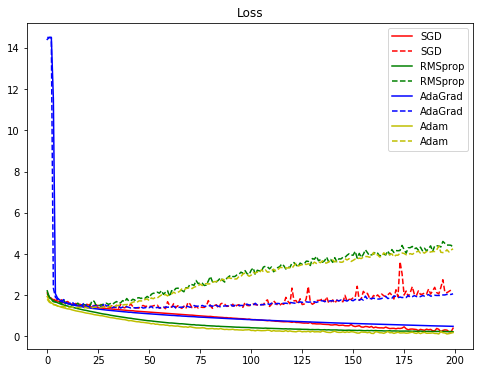

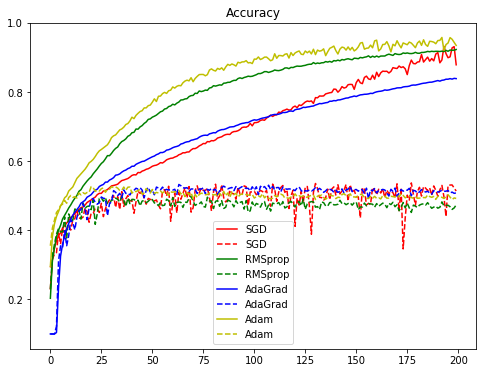

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Learning rate
在這裡原本要跑LR的迴圈，當我想看增加層數的改變，所以改成增加層數的語法。

但有保留LR的迴圈，想跑LR迴圈的人可以自己改參數

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[2048, 1024, 512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+ str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+ str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = [0.001]
EPOCHS = 200
BATCH_SIZE = 256
# MOMENTUM = 0.75

In [7]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 清除舊的Graph
    print('Expertiment with： ' + str(lr) + ' LEARNING_RATE')
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics = ['accuracy'])
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = opt
    results[exp_name_tag] = {'train-loss':train_loss,
                             'valid_loss':valid_loss,
                             'train_acc':train_acc,
                             'valid_acc':valid_acc}

W0724 22:40:07.966478  3196 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0724 22:40:07.968173  3196 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0724 22:40:07.989757  3196 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 22:40:07.992237  3196 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use

Expertiment with： 0.001 LEARNING_RATE
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64

W0724 22:40:08.317612  3196 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 16s 326us/step - loss: 2.0499 - acc: 0.2283 - val_loss: 1.8833 - val_acc: 0.2943
Epoch 2/200
50000/50000 [==============================] - 14s 277us/step - loss: 1.8193 - acc: 0.3341 - val_loss: 1.7769 - val_acc: 0.3596
Epoch 3/200
50000/50000 [==============================] - 14s 278us/step - loss: 1.7195 - acc: 0.3757 - val_loss: 1.6933 - val_acc: 0.3907
Epoch 4/200
50000/50000 [==============================] - 14s 279us/step - loss: 1.6427 - acc: 0.4086 - val_loss: 1.6806 - val_acc: 0.3950
Epoch 5/200
50000/50000 [==============================] - 15s 294us/step - loss: 1.5673 - acc: 0.4362 - val_loss: 1.5449 - val_acc: 0.4494
Epoch 6/200
50000/50000 [==============================] - 14s 285us/step - loss: 1.5243 - acc: 0.4528 - val_loss: 1.5365 - val_acc: 0.4530
Epoch 7/200
50000/50000 [==============================] - 14s 280us/step - loss: 1.4792 - acc: 0.4694 - val_l

Epoch 59/200
50000/50000 [==============================] - 15s 293us/step - loss: 0.1964 - acc: 0.9321 - val_loss: 3.1025 - val_acc: 0.5123
Epoch 60/200
50000/50000 [==============================] - 14s 285us/step - loss: 0.1968 - acc: 0.9323 - val_loss: 3.1822 - val_acc: 0.4963
Epoch 61/200
50000/50000 [==============================] - 14s 287us/step - loss: 0.1769 - acc: 0.9388 - val_loss: 3.2951 - val_acc: 0.5124
Epoch 62/200
50000/50000 [==============================] - 14s 287us/step - loss: 0.1761 - acc: 0.9392 - val_loss: 3.1796 - val_acc: 0.5122
Epoch 63/200
50000/50000 [==============================] - 14s 287us/step - loss: 0.1775 - acc: 0.9396 - val_loss: 3.1524 - val_acc: 0.5217
Epoch 64/200
50000/50000 [==============================] - 14s 286us/step - loss: 0.1681 - acc: 0.9425 - val_loss: 3.3179 - val_acc: 0.5116
Epoch 65/200
50000/50000 [==============================] - 14s 285us/step - loss: 0.1341 - acc: 0.9533 - val_loss: 3.5092 - val_acc: 0.5066
Epoch 66/200


KeyboardInterrupt: 

實在不想等了，自己按停止。。。

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[2048, 1024, 512, 256, 256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+ str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+ str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

LEARNING_RATE = [0.001]
EPOCHS = 200
BATCH_SIZE = 256
# MOMENTUM = 0.75

results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 清除舊的Graph
    print('Expertiment with： ' + str(lr) + ' LEARNING_RATE')
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics = ['accuracy'])
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = opt
    results[exp_name_tag] = {'train-loss':train_loss,
                             'valid_loss':valid_loss,
                             'train_acc':train_acc,
                             'valid_acc':valid_acc}

Expertiment with： 0.001 LEARNING_RATE
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 25

Epoch 48/200
50000/50000 [==============================] - 15s 292us/step - loss: 0.2988 - acc: 0.8945 - val_loss: 2.8064 - val_acc: 0.5078
Epoch 49/200
50000/50000 [==============================] - 14s 290us/step - loss: 0.3064 - acc: 0.8901 - val_loss: 2.7603 - val_acc: 0.5055
Epoch 50/200
50000/50000 [==============================] - 15s 300us/step - loss: 0.2859 - acc: 0.8981 - val_loss: 2.8999 - val_acc: 0.4983
Epoch 51/200
50000/50000 [==============================] - 15s 301us/step - loss: 0.2974 - acc: 0.8941 - val_loss: 2.7954 - val_acc: 0.4968
Epoch 52/200
50000/50000 [==============================] - 15s 306us/step - loss: 0.2757 - acc: 0.9020 - val_loss: 2.9687 - val_acc: 0.4952
Epoch 53/200
50000/50000 [==============================] - 15s 294us/step - loss: 0.2636 - acc: 0.9066 - val_loss: 2.9262 - val_acc: 0.5046
Epoch 54/200
50000/50000 [==============================] - 15s 291us/step - loss: 0.2843 - acc: 0.9001 - val_loss: 2.9049 - val_acc: 0.4970
Epoch 55/200


KeyboardInterrupt: 

val_loss的值越來越高，繼續算下去不會變的更好，先在這邊停止了~